In [2]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Loading dataset
data=pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
data.shape

(583, 11)

In [8]:
#Checking for null values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
#Filling missing data with mean
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [12]:
#Checking for null values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


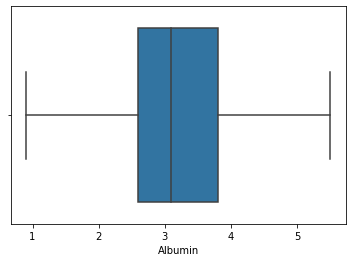

In [15]:
#Handling outliers
sns.boxplot(data['Albumin'])

In [16]:
Q1 = data['Albumin'].quantile(0.25)
Q3 = data['Albumin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Albumin']=np.where(data['Albumin']>upper_whisker,upper_whisker,np.where(data['Albumin']<lower_whisker,lower_whisker,data['Albumin']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


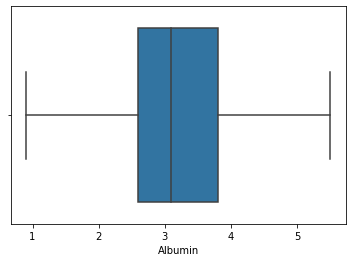

In [17]:
sns.boxplot(data['Albumin'])

In [23]:
#Handling categorical data
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  11
Number of categorical variables:  0


In [19]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [20]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [21]:
#Encoding 'Gender' Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

In [22]:
data['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [24]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  11
Number of categorical variables:  0


In [25]:
#Defining X and Y for independent and dependent variables
X = data.drop("Dataset",axis=1)
Y = data['Dataset']

In [27]:
X[:5]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [26]:
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[ 1.25209764 -1.76228085 -0.41887783 ...  0.29211961  0.19896867
  -0.14789798]
 [ 1.06663704  0.56744644  1.22517135 ...  0.93756634  0.07315659
  -0.65069686]
 [ 1.06663704  0.56744644  0.6449187  ...  0.47653296  0.19896867
  -0.17932291]
 ...
 [ 0.44843504  0.56744644 -0.4027597  ... -0.0767071   0.07315659
   0.16635131]
 [-0.84978917  0.56744644 -0.32216906 ...  0.29211961  0.32478075
   0.16635131]
 [-0.41704777  0.56744644 -0.37052344 ...  0.75315299  1.58290153
   1.73759779]]


In [31]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144
...,...,...,...,...,...,...,...,...,...,...
578,0.942997,0.567446,-0.451114,-0.493964,0.862786,-0.332743,-0.262967,-0.537740,-1.939837,-1.813419
579,-0.293407,0.567446,-0.434996,-0.493964,-0.793378,-0.250535,-0.273359,-0.445534,0.073157,0.480601
580,0.448435,0.567446,-0.402760,-0.458327,-0.187766,-0.179288,-0.211005,-0.076707,0.073157,0.166351
581,-0.849789,0.567446,-0.322169,-0.351417,-0.439074,-0.283418,-0.269895,0.292120,0.324781,0.166351


In [32]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [33]:
X_train.shape

(466, 10)

In [34]:
X_test.shape

(117, 10)

In [35]:
Y_train.shape

(466,)

In [36]:
Y_test.shape

(117,)